<a href="https://colab.research.google.com/github/sidpatil07/new2/blob/main/ML_6_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-learn xgboost catboost

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv('avocado.csv')

data = data.dropna()

X = data.drop(['AveragePrice', 'Date'], axis=1)
y = data['AveragePrice']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
adaboost_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
gradientboost_regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)
xgboost_regressor = XGBRegressor(n_estimators=50, random_state=42)
catboost_regressor = CatBoostRegressor(iterations=50, random_seed=42, logging_level='Silent')

adaboost_regressor.fit(X_train, y_train)
gradientboost_regressor.fit(X_train, y_train)
xgboost_regressor.fit(X_train, y_train)
catboost_regressor.fit(X_train, y_train)

adaboost_predictions = adaboost_regressor.predict(X_test)
gradientboost_predictions = gradientboost_regressor.predict(X_test)
xgboost_predictions = xgboost_regressor.predict(X_test)
catboost_predictions = catboost_regressor.predict(X_test)

adaboost_mae = mean_absolute_error(y_test, adaboost_predictions)
gradientboost_mae = mean_absolute_error(y_test, gradientboost_predictions)
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)
catboost_mae = mean_absolute_error(y_test, catboost_predictions)

adaboost_r2 = r2_score(y_test, adaboost_predictions)
gradientboost_r2 = r2_score(y_test, gradientboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
catboost_r2 = r2_score(y_test, catboost_predictions)

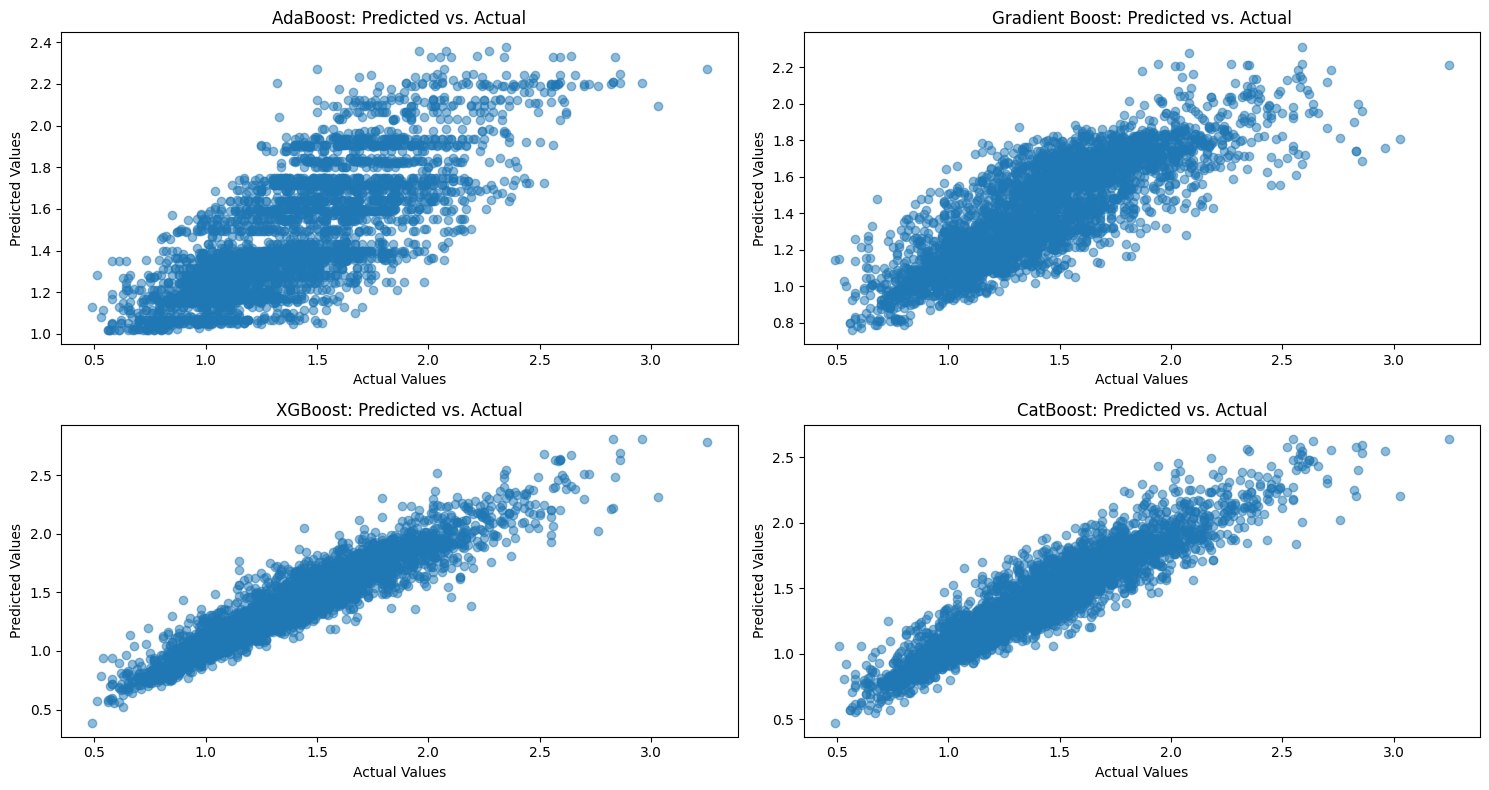

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
plt.scatter(y_test, adaboost_predictions, alpha=0.5)
plt.title('AdaBoost: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 2)
plt.scatter(y_test, gradientboost_predictions, alpha=0.5)
plt.title('Gradient Boost: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 3)
plt.scatter(y_test, xgboost_predictions, alpha=0.5)
plt.title('XGBoost: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(2, 2, 4)
plt.scatter(y_test, catboost_predictions, alpha=0.5)
plt.title('CatBoost: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

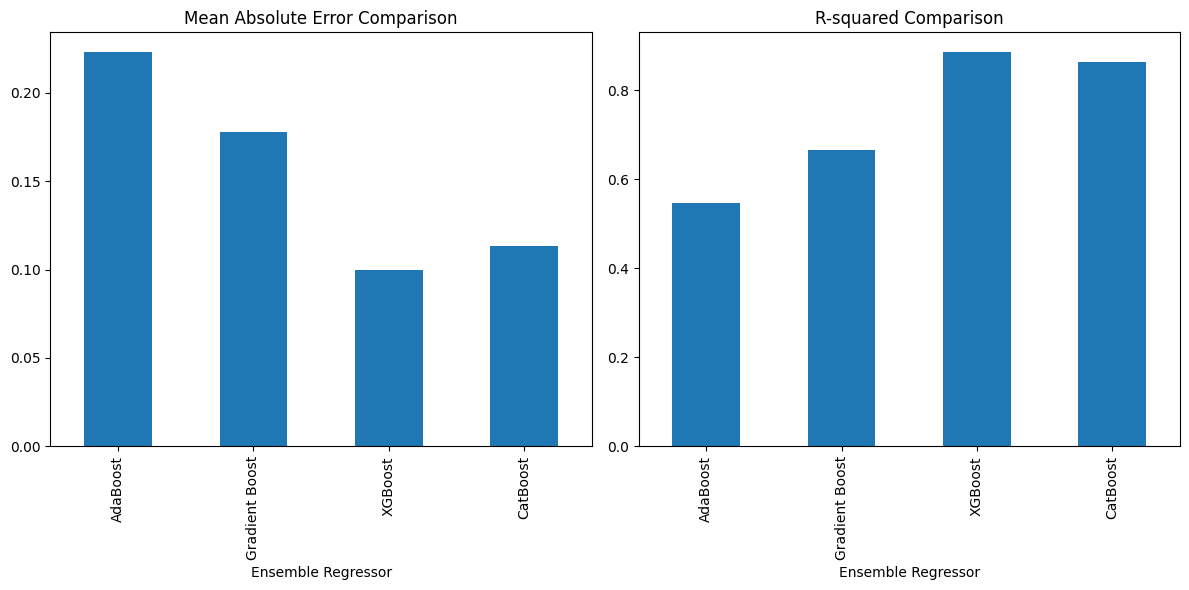

In [ ]:
results = pd.DataFrame({
    'Ensemble Regressor': ['AdaBoost', 'Gradient Boost', 'XGBoost', 'CatBoost'],
    'Mean Absolute Error': [adaboost_mae, gradientboost_mae, xgboost_mae, catboost_mae],
    'R-squared': [adaboost_r2, gradientboost_r2, xgboost_r2, catboost_r2]
})

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

results.plot(x='Ensemble Regressor', y='Mean Absolute Error', kind='bar', legend=False, ax=axs[0])
axs[0].set_title('Mean Absolute Error Comparison')

results.plot(x='Ensemble Regressor', y='R-squared', kind='bar', legend=False, ax=axs[1])
axs[1].set_title('R-squared Comparison')

plt.tight_layout()
plt.show()

In [ ]:
print(results)

  Ensemble Regressor  Mean Absolute Error  R-squared
0           AdaBoost             0.222888   0.545894
1     Gradient Boost             0.177988   0.665722
2            XGBoost             0.099537   0.885314
3           CatBoost             0.113413   0.862127
